In [88]:
import pandas as pd

In [89]:
df=pd.read_parquet('/content/drive/MyDrive/Projet_Deep_learning/Api_yaho/eur_usd_max_data.parquet')

In [90]:
df.tail()

,Date,Open,High,Low,Close,Adj Close
5402,2024-09-24,1.111173,1.116346,1.110396,1.111173,1.111173
5403,2024-09-25,1.119119,1.121240,1.114169,1.119119,1.119119
5404,2024-09-26,1.113102,1.118956,1.112681,1.113102,1.113102
5405,2024-09-27,1.117718,1.119984,1.112656,1.117718,1.117718
5406,2024-09-30,1.116445,1.121202,1.115822,1.120323,1.120323


In [91]:

valeur_max = df['High'].max()

valeur_min = df['High'].min()

print("Valeur maximale de la colonne:", valeur_max)
print("Valeur minimale de la colonne:", valeur_min)


Valeur maximale de la colonne: 1.6028209924697876
Valeur minimale de la colonne: 0.9670057892799377


In [92]:
df1=df.reset_index()['High']

In [93]:
df1

,High
0,1.204007
1,1.210903
2,1.213003
3,1.214403
4,1.219096
...,...
5402,1.116346
5403,1.121240
5404,1.118956
5405,1.119984


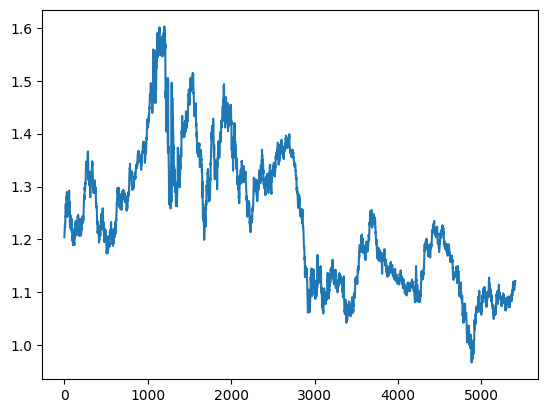

In [94]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [95]:
import numpy as np

In [96]:
df1

,High
0,1.204007
1,1.210903
2,1.213003
3,1.214403
4,1.219096
...,...
5402,1.116346
5403,1.121240
5404,1.118956
5405,1.119984


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [98]:
print(df1)

[[0.37275158]
 [0.38359772]
 [0.38690111]
 ...
 [0.23898519]
 [0.24060155]
 [0.24251714]]


In [99]:

training_size=int(len(df1)*0.9)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [100]:
training_size,test_size

(4866, 541)

In [101]:
train_data

array([[0.37275158],
       [0.38359772],
       [0.38690111],
       ...,
       [0.06406521],
       [0.05909746],
       [0.05713181]])

In [102]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [103]:

time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [104]:
print(X_train.shape), print(y_train.shape)

(4815, 50)
(4815,)


(None, None)

In [105]:
print(X_test.shape), print(ytest.shape)

(490, 50)
(490,)


(None, None)

In [106]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [107]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [108]:
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(50, 1)))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(100))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, ytest), 
          epochs=100, batch_size=8, verbose=1, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 50, 100)             │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,501 (947.27 KB)

 Trainable params: 242,501 (947.27 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
import joblib
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

model_path = '/content/drive/MyDrive/Projet_Deep_learning/models/model_High.h5'
model.save(model_path)

scaler_filename = '/content/drive/MyDrive/Projet_Deep_learning/models/scaler_High.pkl'
joblib.dump(scaler, scaler_filename)

In [112]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Projet_Deep_learning/models/model_High.h5')


In [113]:
import tensorflow as tf

In [114]:
tf.__version__

'2.17.0'

In [115]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [116]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [117]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.8106876474000584

In [118]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.8983865181829926

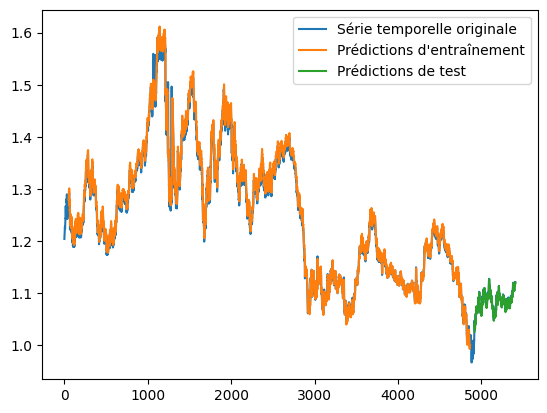

In [119]:
import numpy
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1), label='Série temporelle originale')
plt.plot(trainPredictPlot, label='Prédictions d\'entraînement')
plt.plot(testPredictPlot, label='Prédictions de test')
plt.legend()
plt.show()

In [120]:
len(test_data)

541

In [121]:
var = len(test_data) - time_step
x_input=test_data[var:].reshape(1,-1)
x_input.shape


(1, 50)

In [122]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [123]:
temp_input

[0.19350169289830155,
 0.18817358879909452,
 0.1878392932959314,
 0.1884893227459965,
 0.18902835783943095,
 0.18365413108527262,
 0.1858738307274188,
 0.18365413108527262,
 0.19756648622896567,
 0.21033458705083952,
 0.20336894121039517,
 0.19916390501020453,
 0.20082075826957158,
 0.1983741951620146,
 0.19969075322326568,
 0.20327463350535258,
 0.21679963334364216,
 0.21182213641825132,
 0.20985836126394442,
 0.22059012812067325,
 0.2276178333057879,
 0.23249108553137,
 0.2339388869197181,
 0.23999014175123023,
 0.2407987881366156,
 0.23741121037377244,
 0.23778487887506472,
 0.23122158757740663,
 0.22422275592425334,
 0.22138115040213413,
 0.2202623947838651,
 0.22395164470856432,
 0.22822080264856526,
 0.23270632458780915,
 0.22354535286596522,
 0.2170876187013866,
 0.21781789407144814,
 0.21664607865093854,
 0.22528845174028178,
 0.23046056377071067,
 0.2321588524233471,
 0.23131908262039302,
 0.23758820137488623,
 0.23774550587693555,
 0.23562423873011196,
 0.23487915161313522,
 

In [124]:

from numpy import array

lst_output=[]
n_steps=50


if(len(temp_input)>50):

    x_input=np.array(temp_input[1:])

    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)

    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]

    lst_output.extend(yhat.tolist())

else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)

    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
print(lst_output)

[[0.24209800362586975]]


In [125]:

scaled_value = np.array(lst_output) 
original_value = scaler.inverse_transform(scaled_value)

print(original_value)


[[1.12093538]]


In [ ]:
import json
import os


single_value = original_value[0][0] 

filename = '/content/drive/MyDrive/Projet_Deep_learning/notebook_model_classification/output_models.json'


if os.path.exists(filename):
    with open(filename, 'r') as json_file:
        try:
     
            output_dict = json.load(json_file)
        except json.JSONDecodeError:
 
            output_dict = {}
else:

    output_dict = {}

output_dict["High"] = single_value

with open(filename, 'w') as json_file:
    json.dump(output_dict, json_file)

print("La prédiction a été enregistrée dans 'lst_output_with_keys.json' avec la clé 'open'.")


In [126]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [127]:
import matplotlib.pyplot as plt

In [128]:
len(df1)

5407

In [129]:
len(lst_output)

1

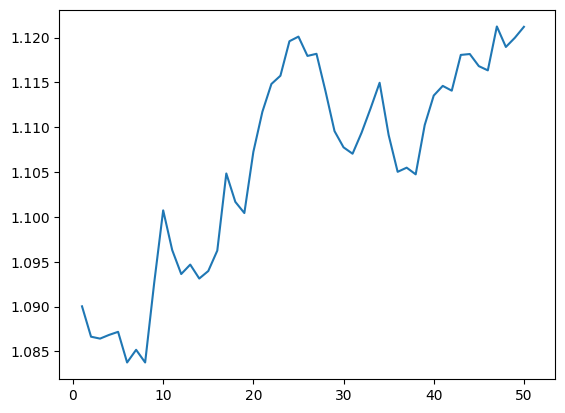

In [130]:
var = len(df1) - time_step
plt.plot(day_new,scaler.inverse_transform(df1[var:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

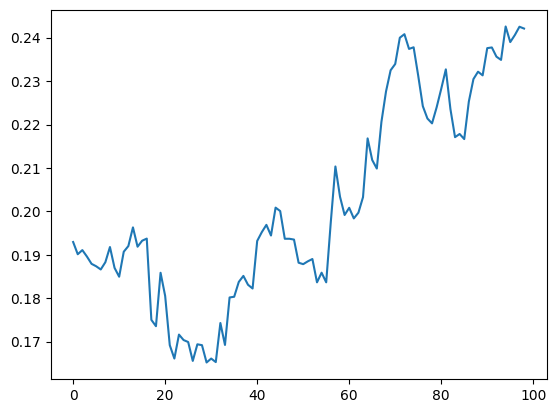

In [131]:
df3=df1.tolist()
df3.extend(lst_output)
var =len(lst_output) - 2 * time_step
plt.plot(df3[var:])

In [132]:
df3=scaler.inverse_transform(df3).tolist()

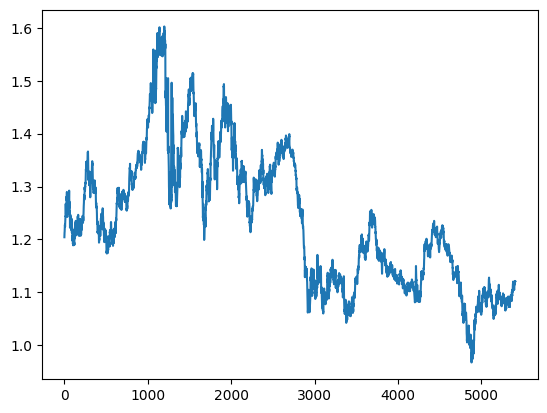

In [133]:
plt.plot(df3)